In [1]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from IPython.display import display

%matplotlib inline

from matplotlib import pyplot as plt
import re

import seaborn as sns

from scipy.stats import boxcox

from sklearn.metrics import mean_squared_error,roc_auc_score

def error(y_pred,y_true):
    return 1-np.sqrt(mean_squared_error(y_true,y_pred))

from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import string

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder,OneHotEncoder

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

import lightgbm as lgb

from xgboost import XGBRegressor,XGBClassifier,XGBRFClassifier

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize,word_tokenize

from sklearn.decomposition import TruncatedSVD

import rfpimp as rf



def display_all(df):
    with pd.option_context("display.max_rows", 7000, "display.max_columns", 7000): 
        display(df)

from scipy.special import boxcox1p,boxcox

In [2]:
plt.rcParams['figure.figsize']=[20,12]

In [3]:
def print_score(m):
    score={'roc_test':roc_auc_score(m.predict(X_test),y_test),
           'roc_train':roc_auc_score(m.predict(X_train),y_train),
           'r2_train':m.score(X_train,y_train),
           'r2_test':m.score(X_test,y_test)}
    if hasattr(m,'oob_score_'):
           score['oob_score']=m.oob_score_
    return score
        

In [4]:
def imp_cols_print_score(m):
    return {'roc_test':roc_auc_score(m.predict(X_test[important_cols]),y_test),
           'roc_train':roc_auc_score(m.predict(X_train[important_cols]),y_train),
           'r2_train':m.score(X_train[important_cols],y_train),
           'r2_test':m.score(X_test[important_cols],y_test),
           'oob_score':m.oob_score_}

In [5]:
def xx_print_score(m):
    return {'roc_test':roc_auc_score(m.predict(xxtest),y_test),
           'roc_train':roc_auc_score(m.predict(xxtrain),y_train),
           'r2_train':m.score(xxtrain,y_train),
           'r2_test':m.score(xxtest,y_test),
           'oob_score':m.oob_score_}

In [6]:
df=pd.read_csv('Cross Sell/Cross Sell.csv')

In [7]:
df.head()

,AcctAge,DDA,DDABal,CashBk,Checks,DirDep,NSF,NSFAmt,Phone,Teller,...,CRScore,Moved,InArea,Ins,Branch,Res,Dep,DepAmt,Inv,InvBal
0,0.3,1.0,419.27,0.0,0.0,0.0,0.0,0.0,0,0.0,...,696,0.0,1.0,1.0,B17,R,2.0,1170.06,0,0
1,0.7,1.0,1986.81,0.0,1.0,1.0,0.0,0.0,0,0.0,...,674,0.0,1.0,0.0,B2,R,1.0,446.93,0,0
2,4.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,...,640,0.0,1.0,1.0,B3,S,0.0,0.00,0,0
3,0.5,1.0,1594.84,0.0,1.0,0.0,0.0,0.0,0,1.0,...,672,0.0,1.0,0.0,B1,S,1.0,1144.24,0,0
4,6.7,1.0,2813.45,0.0,2.0,0.0,0.0,0.0,0,5.0,...,648,0.0,1.0,1.0,B1,S,2.0,1208.94,0,0


In [8]:
display_all(df.describe())

,DDA,DDABal,CashBk,Checks,DirDep,NSF,NSFAmt,Teller,Sav,SavBal,ATM,ATMAmt,CD,CDBal,IRA,IRABal,LOC,LOCBal,ILS,ILSBal,MM,MMBal,MMCred,MTG,MTGBal,SDB,Moved,InArea,Ins,Dep,DepAmt
count,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,3.226400e+04,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,3.226400e+04,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000
mean,0.815646,2170.016712,0.015962,4.259918,0.295562,0.087063,2.290546,1.365268,0.466898,3170.603687,0.609937,1235.414658,0.125837,2.530709e+03,0.053279,617.570455,0.063383,1175.219354,0.049591,517.569234,0.114896,1875.763193,0.056379,0.049343,8.081736e+03,0.108666,0.029631,0.960296,0.346361,2.134608,2232.760183
std,0.387779,7282.726998,0.131368,5.156643,0.456302,0.281932,14.363677,2.283765,0.498911,13397.146902,0.487772,4462.281901,0.331671,1.481178e+04,0.224593,7516.564820,0.243655,9605.284463,0.217102,2285.187054,0.318901,5484.479566,0.287484,0.216586,7.979412e+04,0.311225,0.169568,0.195265,0.475817,1.721797,6704.292297
min,0.000000,-774.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-613.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,59.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,149.650000
50%,1.000000,571.820000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,136.275000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,2.000000,1103.620000
75%,1.000000,1834.232500,0.000000,7.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1215.815000,1.000000,1202.797500,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,3.000000,2439.530000
max,1.000000,278093.830000,4.000000,49.000000,1.000000,1.000000,666.850000,27.000000,1.000000,700026.940000,1.000000,427731.260000,1.000000,1.053900e+06,1.000000,596497.600000,1.000000,523147.240000,1.000000,29162.790000,1.000000,120801.110000,5.000000,1.000000,1.088757e+07,1.000000,1.000000,1.000000,1.000000,28.000000,484893.670000


In [11]:
df.isnull().sum()/df.shape[0]

AcctAge    0.0
DDA        0.0
DDABal     0.0
CashBk     0.0
Checks     0.0
DirDep     0.0
NSF        0.0
NSFAmt     0.0
Phone      0.0
Teller     0.0
Sav        0.0
SavBal     0.0
ATM        0.0
ATMAmt     0.0
POS        0.0
POSAmt     0.0
CD         0.0
CDBal      0.0
IRA        0.0
IRABal     0.0
LOC        0.0
LOCBal     0.0
ILS        0.0
ILSBal     0.0
MM         0.0
MMBal      0.0
MMCred     0.0
MTG        0.0
MTGBal     0.0
CC         0.0
CCBal      0.0
CCPurc     0.0
SDB        0.0
Income     0.0
HMOwn      0.0
LORes      0.0
HMVal      0.0
Age        0.0
CRScore    0.0
Moved      0.0
InArea     0.0
Ins        0.0
Branch     0.0
Res        0.0
Dep        0.0
DepAmt     0.0
Inv        0.0
InvBal     0.0
dtype: float64

In [10]:
df.drop(32264,inplace=True)

In [12]:
test_percent=.8
split_test=int(test_percent*df.shape[0])
train=df[:split_test]
test=df[split_test:]

In [13]:
train.shape

(25811, 48)

In [14]:
test.shape

(6453, 48)

In [15]:
m=RandomForestClassifier()

In [16]:
m.fit(train.drop('Ins',axis=1),train[['Ins']])

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: '.'

In [17]:
display_all(df.tail(10))

,AcctAge,DDA,DDABal,CashBk,Checks,DirDep,NSF,NSFAmt,Phone,Teller,Sav,SavBal,ATM,ATMAmt,POS,POSAmt,CD,CDBal,IRA,IRABal,LOC,LOCBal,ILS,ILSBal,MM,MMBal,MMCred,MTG,MTGBal,CC,CCBal,CCPurc,SDB,Income,HMOwn,LORes,HMVal,Age,CRScore,Moved,InArea,Ins,Branch,Res,Dep,DepAmt,Inv,InvBal
32254,3.7,1.0,16.38,0.0,3.0,1.0,1.0,14.9,17,3.0,1.0,5.10,1.0,388.76,2,97.2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0.0,31,1,7.5,102,25,640,0.0,1.0,0.0,B2,S,4.0,952.02,0,0
32255,8.6,1.0,46593.63,0.0,9.0,1.0,0.0,0.0,0,11.0,0.0,0.00,0.0,0.00,0,0,0.0,0.0,0.0,0.0,1.0,112306.85,0.0,0.00,1.0,47406.48,0.0,0.0,0.0,1,108200.42,0,0.0,45,1,8.5,207,70,721,0.0,1.0,0.0,B3,U,3.0,55203.58,0,0
32256,13,1.0,4062.53,0.0,16.0,0.0,0.0,0.0,0,8.0,1.0,5602.76,0.0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1.0,17094.72,0.0,0.0,0.0,0,0,0,0.0,41,1,8,107,69,698,0.0,1.0,0.0,B1,S,3.0,7383.58,0,0
32257,3.9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,0.00,0,0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,9912.78,0.0,0.00,0.0,0.0,0.0,1,178531.73,0,0.0,60,1,7,114,61,716,0.0,1.0,0.0,B2,S,0.0,0.00,0,0
32258,2.2,1.0,1037.98,0.0,2.0,1.0,0.0,0.0,0,0.0,1.0,44.67,1.0,72.64,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0.0,12,0,5.5,95,55,760,0.0,1.0,0.0,B4,R,1.0,679.43,0,0
32259,0.6,1.0,1073.88,0.0,8.0,1.0,0.0,0.0,0,0.0,0.0,0.00,1.0,307.49,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0.0,52,0,5,129,37,634,0.0,1.0,0.0,B16,R,2.0,978.54,0,0
32260,.,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1,0,0,0.0,69,1,6.5,124,37,586,0.0,1.0,1.0,B1,S,0.0,0.00,0,0
32261,19.1,1.0,2139.59,0.0,7.0,1.0,0.0,0.0,2,0.0,0.0,0.00,1.0,1346.41,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0.0,.,.,.,.,.,596,0.0,1.0,1.0,B2,S,3.0,3226.87,0,0
32262,2.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,4252.13,0.0,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0.0,42,0,7.5,118,32,680,0.0,1.0,1.0,B5,S,0.0,0.00,0,0
32263,13,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,0.00,0,0,1.0,16000.0,0.0,0.0,0.0,0.00,0.0,0.00,1.0,14812.47,0.0,0.0,0.0,1,1536.43,0,1.0,22,0,3.5,109,39,600,0.0,0.0,0.0,B4,U,0.0,0.00,0,0


In [18]:
df[['R','S','U']]=pd.get_dummies(df.Res)

In [19]:
df.Branch.unique()

array(['B17', 'B2', 'B3', 'B1', 'B7', 'B5', 'B14', 'B6', 'B4', 'B19', 'B15', 'B16', 'B9', 'B18', 'B10', 'B8',
       'B12', 'B11', 'B13'], dtype=object)

In [20]:
df[['B1', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18','B19', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']]=pd.get_dummies(df.Branch)

In [21]:
df.drop(['Res','Branch'],axis=1,inplace=True)

In [22]:
test_percent=.8
split_test=int(test_percent*df.shape[0])
train=df[:split_test]
test=df[split_test:]

In [23]:
df_cleaned=df.replace('.','0')

In [24]:
test_percent=.8
split_test=int(test_percent*df.shape[0])
train=df_cleaned[:split_test]
test=df_cleaned[split_test:]

In [25]:
m.fit(train.drop('Ins',axis=1),train[['Ins']])

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
train_cats(df_cleaned)

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32264 entries, 0 to 32263
Data columns (total 68 columns):
AcctAge    32264 non-null category
DDA        32264 non-null float64
DDABal     32264 non-null float64
CashBk     32264 non-null float64
Checks     32264 non-null float64
DirDep     32264 non-null float64
NSF        32264 non-null float64
NSFAmt     32264 non-null float64
Phone      32264 non-null category
Teller     32264 non-null float64
Sav        32264 non-null float64
SavBal     32264 non-null float64
ATM        32264 non-null float64
ATMAmt     32264 non-null float64
POS        32264 non-null category
POSAmt     32264 non-null category
CD         32264 non-null float64
CDBal      32264 non-null float64
IRA        32264 non-null float64
IRABal     32264 non-null float64
LOC        32264 non-null float64
LOCBal     32264 non-null float64
ILS        32264 non-null float64
ILSBal     32264 non-null float64
MM         32264 non-null float64
MMBal      32264 non-null float64
MMC

In [28]:
df_cleaned.AcctAge=df_cleaned.AcctAge.astype(np.float64)

In [29]:
df_cleaned.Phone=df_cleaned.Phone.astype(np.float64)

In [30]:
for _ in df_cleaned.columns:
    if df_cleaned[_].dtype!=np.float64 and df_cleaned[_].dtype!=np.int64:
        print(_)
#      print(df_cleaned[_].dtype)

POS
POSAmt
CC
CCBal
CCPurc
Income
HMOwn
LORes
HMVal
Age
CRScore
Inv
InvBal


In [31]:
df_cleaned.POS=df_cleaned.POS.astype(np.float64)

In [32]:

df_cleaned.POSAmt=df_cleaned.POSAmt.astype(np.float64)

In [33]:
cat_cols=[_ for _ in df_cleaned.columns if (df_cleaned[_].dtype!=np.float64) and (df_cleaned[_].dtype!=np.int64)]

In [34]:
cat_cols

['CC',
 'CCBal',
 'CCPurc',
 'Income',
 'HMOwn',
 'LORes',
 'HMVal',
 'Age',
 'CRScore',
 'Inv',
 'InvBal']

In [35]:
set(df_cleaned[cat_cols[0]].unique())

{'0', '1'}

In [36]:
df_cleaned.CC=df_cleaned.CC.astype(np.int64)

In [37]:
df_cleaned.Ins=df_cleaned.Ins.astype(np.int64)

In [38]:
for _ in cat_cols:
    display_all(df_cleaned[_].head(60))
    t=str(input("type:=> "))
    if t=='i':
        df_cleaned[_]=df_cleaned[_].astype(np.int64)
    elif t=='f':
        df_cleaned[_]=df_cleaned[_].astype(np.float64)
    else:
        print(_)

0     1
1     1
2     1
3     1
4     0
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    1
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    1
26    0
27    1
28    0
29    0
30    0
31    0
32    0
33    1
34    0
35    1
36    0
37    0
38    1
39    1
40    1
41    0
42    0
43    1
44    0
45    0
46    1
47    1
48    0
49    1
50    0
51    0
52    0
53    1
54    1
55    1
56    1
57    0
58    1
59    0
Name: CC, dtype: int64

type:=> I
CC


0        483.65
1             0
2             0
3         65.76
4             0
5         38.62
6      85202.99
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16       323.13
17            0
18            0
19            0
20            0
21     32366.86
22            0
23            0
24            0
25      1378.46
26            0
27     17135.95
28            0
29            0
30            0
31            0
32            0
33    310836.87
34            0
35      1466.87
36            0
37            0
38      9667.13
39      2726.93
40        77.94
41            0
42            0
43       1260.4
44            0
45            0
46     40530.61
47      2730.69
48            0
49      4244.01
50            0
51            0
52            0
53     16697.06
54      81299.9
55       305.39
56        805.2
57            0
58       274.81
59            0
Name: CCBal, dtype: category
Categories 

type:=> f


0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    1
34    0
35    0
36    0
37    0
38    0
39    1
40    1
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
Name: CCPurc, dtype: category
Categories (6, object): [0 < 1 < 2 < 3 < 4 < 5]

type:=> i


0      16
1       4
2      30
3     125
4      25
5      19
6      55
7      13
8      20
9      54
10      0
11     25
12    102
13     24
14      8
15    100
16     13
17     17
18      8
19      7
20      0
21      0
22      9
23     45
24     36
25     60
26     35
27     40
28     42
29    112
30     28
31     88
32     25
33    100
34     54
35     45
36     31
37     13
38     35
39     15
40     29
41    108
42      0
43     55
44      0
45     10
46     65
47     18
48     27
49     81
50     63
51    105
52     17
53     20
54     35
55     24
56      0
57     42
58    233
59     32
Name: Income, dtype: category
Categories (203, object): [0 < 1 < 10 < 100 ... 96 < 97 < 98 < 99]

type:=> f


0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    1
19    1
20    0
21    1
22    0
23    1
24    1
25    1
26    1
27    1
28    0
29    1
30    1
31    1
32    0
33    1
34    0
35    0
36    0
37    0
38    0
39    0
40    1
41    1
42    1
43    0
44    0
45    0
46    1
47    0
48    1
49    1
50    0
51    1
52    1
53    1
54    1
55    1
56    0
57    0
58    1
59    0
Name: HMOwn, dtype: category
Categories (2, object): [0 < 1]

type:=> i


0       11
1        7
2      8.5
3      7.5
4        6
5        3
6      3.5
7      4.5
8        4
9        4
10       0
11     7.5
12       5
13     8.5
14      12
15      13
16      10
17     6.5
18    12.5
19     9.5
20       0
21       0
22    10.5
23     8.5
24     7.5
25       7
26     3.5
27     8.5
28     4.5
29      10
30       9
31       8
32     7.5
33     2.5
34     4.5
35       6
36       4
37       5
38     3.5
39     5.5
40       9
41     5.5
42       0
43       4
44       0
45       6
46       5
47       3
48      12
49     7.5
50     2.5
51       5
52    10.5
53       9
54     5.5
55       5
56       0
57       4
58       7
59     3.5
Name: LORes, dtype: category
Categories (40, object): [0 < 0.5 < 1 < 1.5 ... 8 < 8.5 < 9 < 9.5]

type:=> f


0      89
1      87
2      97
3     145
4     101
5     107
6     128
7      99
8     107
9     129
10      0
11     95
12    146
13     95
14     91
15    135
16     77
17     99
18     76
19     96
20      0
21      0
22     98
23    111
24    102
25    115
26     99
27     91
28    115
29    140
30    101
31    129
32    110
33    144
34    127
35    130
36     97
37     94
38     95
39     88
40     96
41    128
42      0
43    129
44      0
45     97
46    113
47    103
48    106
49    132
50    123
51    156
52     91
53    148
54    106
55     85
56      0
57    123
58    216
59    118
Name: HMVal, dtype: category
Categories (204, object): [0 < 100 < 101 < 102 ... 96 < 97 < 98 < 99]

type:=> f


0     63
1     51
2     60
3     44
4     46
5     55
6     57
7     58
8     40
9     73
10     0
11    29
12    34
13    54
14    58
15    75
16    51
17    52
18    61
19    49
20     0
21     0
22    39
23    54
24    40
25    67
26    46
27    62
28    62
29    37
30    63
31    22
32    32
33    48
34    49
35    27
36    53
37    46
38    35
39    47
40    33
41    57
42     0
43     0
44     0
45    83
46    49
47    32
48    61
49    22
50    52
51    24
52    54
53    45
54    40
55    57
56     0
57    49
58    27
59    30
Name: Age, dtype: category
Categories (80, object): [0 < 16 < 17 < 18 ... 91 < 92 < 93 < 94]

type:=> f


0     696
1     674
2     640
3     672
4     648
5     662
6     659
7     675
8     642
9     667
10    620
11    612
12    711
13    732
14    662
15    715
16    679
17    668
18    688
19    656
20    580
21    605
22    699
23    635
24    641
25    716
26    642
27    667
28    632
29    652
30    710
31    626
32    708
33    632
34    708
35    608
36    693
37    713
38    686
39    593
40    656
41    710
42    726
43      0
44    594
45    730
46    693
47    660
48    687
49    631
50    634
51    642
52    665
53    639
54    614
55    742
56    719
57    640
58    635
59    629
Name: CRScore, dtype: category
Categories (286, object): [0 < 509 < 518 < 520 ... 811 < 813 < 817 < 820]

type:=> f


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    1
58    0
59    0
Name: Inv, dtype: category
Categories (2, object): [0 < 1]

type:=> i


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
Name: InvBal, dtype: category
Categories (479, object): [-2214.92 < -659.77 < 0 < 0.92 ... 98746 < 98853.87 < 9936.4 < 9999.36]

type:=> f


In [39]:
cat_cols=[_ for _ in df_cleaned.columns if (df_cleaned[_].dtype!=np.float64) and (df_cleaned[_].dtype!=np.int64)]

In [40]:
for _ in cat_cols:
    l=LabelEncoder()
    df_cleaned[_]=l.fit_transform(df_cleaned[_])

In [41]:
test_percent=.8
split_test=int(test_percent*df.shape[0])
train=df_cleaned[:split_test]
test=df_cleaned[split_test:]

In [42]:
m=RandomForestClassifier(n_jobs=-1)

In [43]:
%time m.fit(train.drop('Ins',axis=1),train[['Ins']])

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Wall time: 593 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [44]:
m.score(test.drop('Ins',axis=1),test[['Ins']])

0.7221447388811405

In [45]:
roc_auc_score(m.predict(test.drop('Ins',axis=1)),test['Ins'])

0.6904979783353511

In [46]:
imp=rf.importances(m,test.drop('Ins',axis=1),test[['Ins']])

<Figure size 1440x576 with 0 Axes>

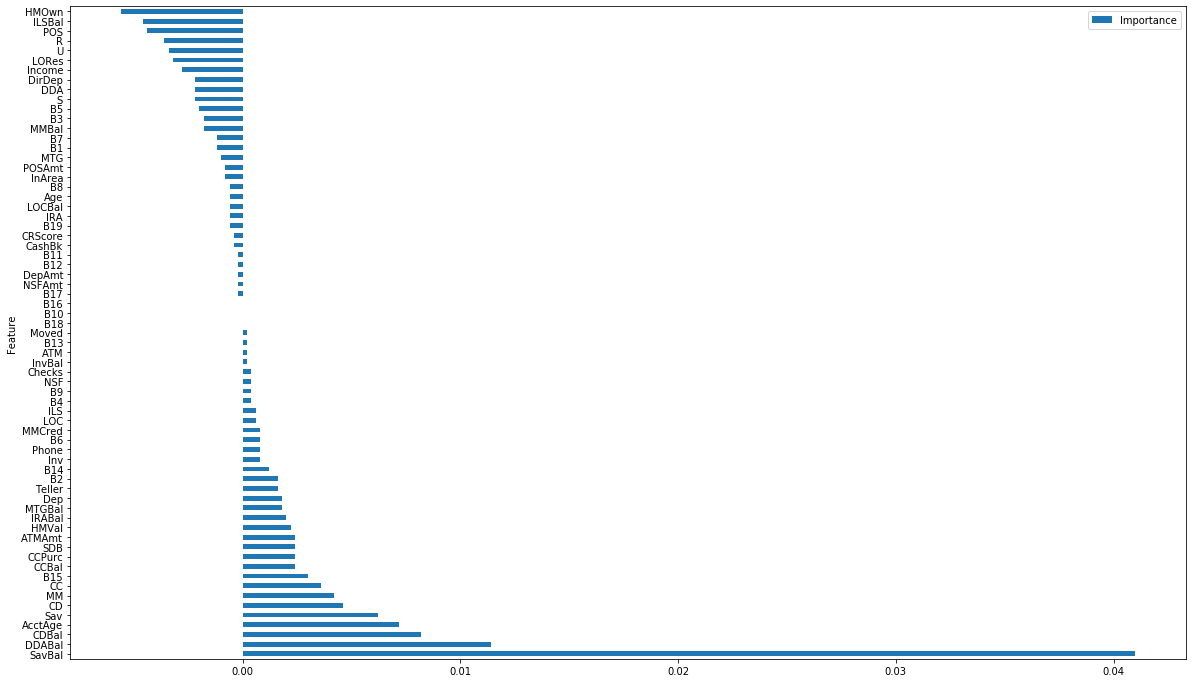

In [48]:
plt.figure(figsize=(20,8))
imp.plot.barh()

In [49]:
m.predict(test.drop('Ins',axis=1))

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [50]:
X_train,y_train=train.drop('Ins',axis=1),train[['Ins']]
X_test,y_test=test.drop('Ins',axis=1),test[['Ins']].values

In [51]:
m = RandomForestClassifier(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(train.drop('Ins',axis=1),train[['Ins']])
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'roc_test': 0.6614304751884973,
 'roc_train': 0.6511522927414367,
 'r2_train': 0.6788578513037077,
 'r2_test': 0.6891368355803502}

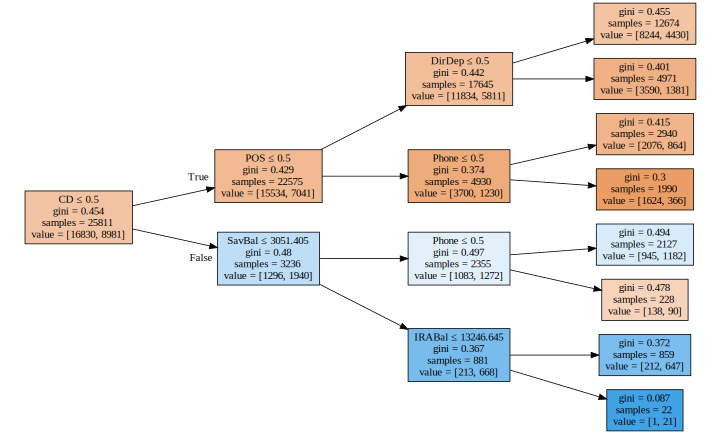

In [52]:
draw_tree(m.estimators_[0], X_test, precision=3)

In [53]:
m = RandomForestRegressor(n_estimators=1, n_jobs=-1,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


{'roc_test': 0.6274937575102076,
 'roc_train': 0.8639674713748406,
 'r2_train': 0.4585077310170153,
 'r2_test': -0.4985703501384708,
 'oob_score': -0.5254337555424162}

In [54]:
m = RandomForestClassifier(n_estimators=400,n_jobs=-1,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'roc_test': 0.7159182009631468,
 'roc_train': 1.0,
 'r2_train': 1.0,
 'r2_test': 0.7449248411591508,
 'oob_score': 0.7489055054046724}

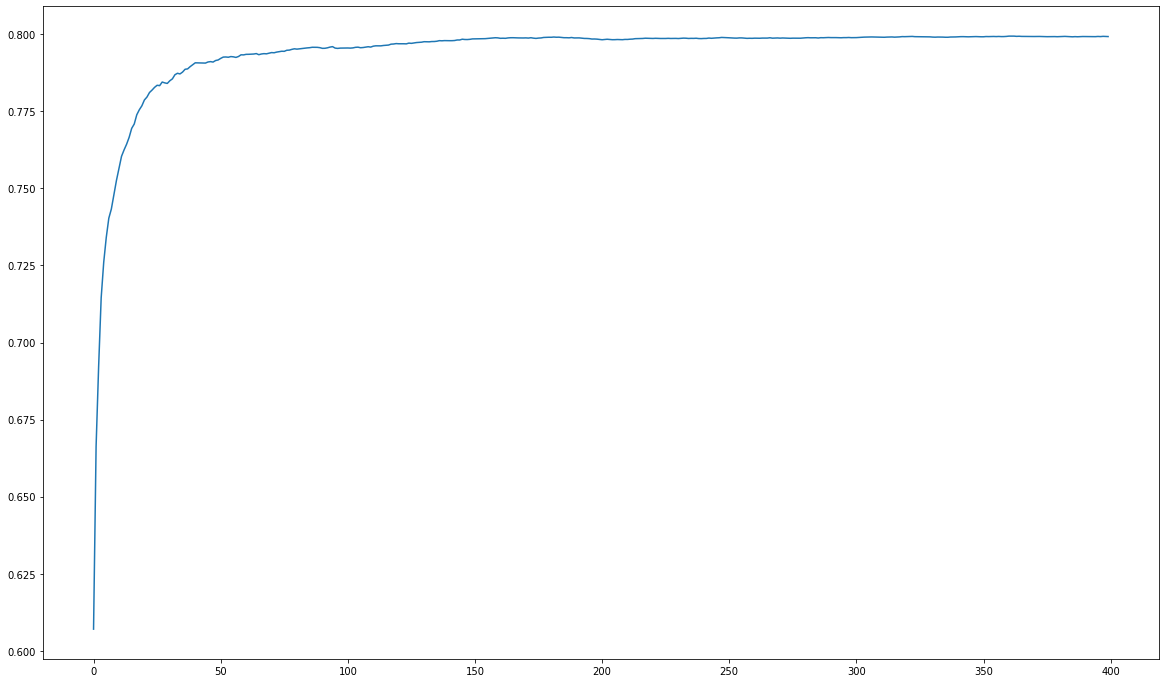

In [55]:
preds = np.stack([t.predict(X_test) for t in m.estimators_])

preds[:,0],np.mean(preds[:,0]),y_test[0]

preds.shape

plt.plot([metrics.roc_auc_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(400)]);

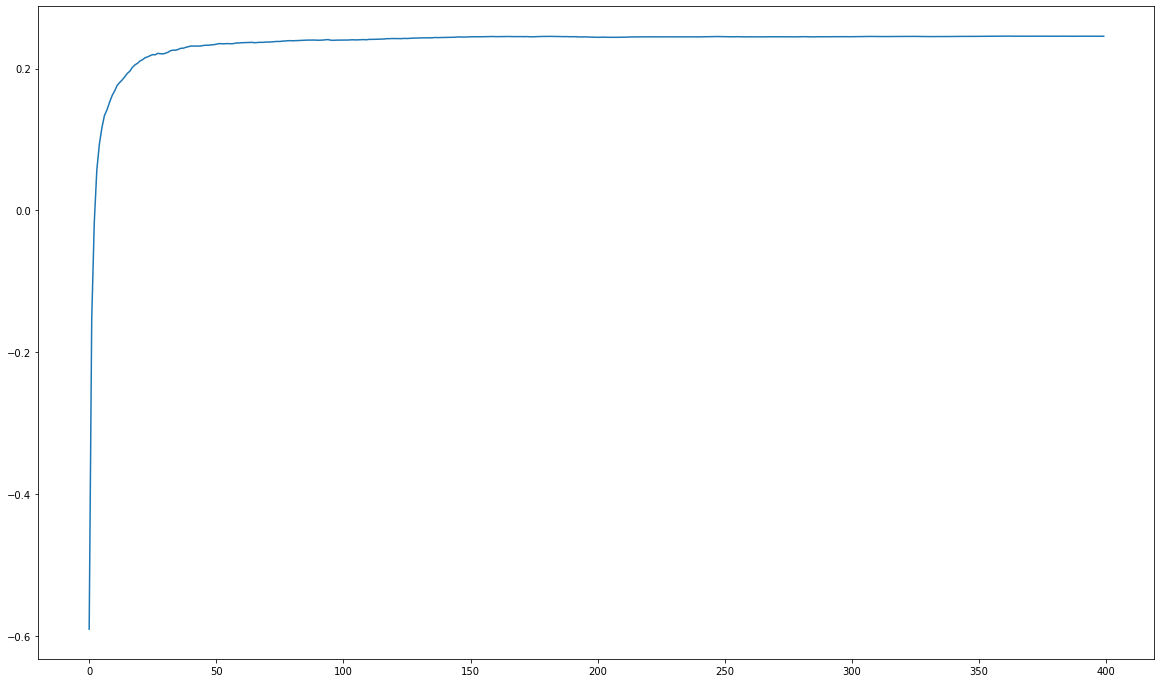

In [56]:
plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(400)]);

In [57]:
set_rf_samples(11000)

In [58]:
m = RandomForestClassifier(n_estimators=250,n_jobs=-1,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'roc_test': 0.718031208159933,
 'roc_train': 0.9615648607209967,
 'r2_train': 0.9526558444074232,
 'r2_test': 0.7464745079807842,
 'oob_score': 0.7490217349192205}

In [59]:
reset_rf_samples()

In [60]:
random.seed(42)
m = RandomForestClassifier(n_estimators=250,n_jobs=-1,oob_score=True,min_samples_leaf=20)
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


{'roc_test': 0.7160400105054023,
 'roc_train': 0.7785588443549103,
 'r2_train': 0.7915229940722948,
 'r2_test': 0.7439950410661708,
 'oob_score': 0.746154740227035}

In [61]:
m = RandomForestClassifier(n_estimators=250,n_jobs=-1,oob_score=True,min_samples_leaf=20,max_features=15)
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'roc_test': 0.7148896763805984,
 'roc_train': 0.789156431616772,
 'r2_train': 0.8022935957537484,
 'r2_test': 0.7439950410661708,
 'oob_score': 0.7487892758901243}

In [62]:
m = RandomForestClassifier(n_estimators=100,n_jobs=-1,oob_score=True,min_samples_leaf=20,max_features=15)
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'roc_test': 0.7172279681268325,
 'roc_train': 0.7889529809280126,
 'r2_train': 0.8023710820967804,
 'r2_test': 0.7458546412521307,
 'oob_score': 0.7493704234628646}

In [63]:
m = RandomForestClassifier(n_estimators=100, min_samples_leaf=29, max_features=15, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'roc_test': 0.7137684845119694,
 'roc_train': 0.7687564335232688,
 'r2_train': 0.7852466002866995,
 'r2_test': 0.7430652409731907,
 'oob_score': 0.748130641974352}

In [64]:
m = RandomForestClassifier(n_estimators=100, 
                           min_samples_leaf=20, 
                           max_features=20, 
                           n_jobs=-1, 
                           oob_score=True,max_depth=5,
                          )
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


{'roc_test': 0.7117600261397053,
 'roc_train': 0.722642783541592,
 'r2_train': 0.7436751772500096,
 'r2_test': 0.7391910739191074,
 'oob_score': 0.7362752314904498}

In [65]:
df_cleaned.to_feather('Cross Sell/preprocessedDF')

In [66]:
%time preds = np.stack([t.predict(X_test) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 460 ms


(0.32, 0.46647615158762396)

In [67]:
def parallel_trees(m, fn, n_jobs=8):
    return list(ThreadPoolExecutor(n_jobs).map(fn, m.estimators_))

In [68]:
def get_preds(t): return t.predict(X_test)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 300 ms


(0.32, 0.46647615158762396)

In [69]:
m = RandomForestClassifier(n_estimators=250,n_jobs=-1,oob_score=True,min_samples_leaf=20,max_features=15)
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'roc_test': 0.7162308416049846,
 'roc_train': 0.7889464207241201,
 'r2_train': 0.8022161094107164,
 'r2_test': 0.7449248411591508,
 'oob_score': 0.7498740846925729}

In [70]:
m = RandomForestClassifier(n_estimators=250,n_jobs=-1,oob_score=True,min_samples_leaf=20,max_features=15,max_depth=30)
m.fit(X_train, y_train)
print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'roc_test': 0.7207193147821233,
 'roc_train': 0.7890184192283363,
 'r2_train': 0.8023710820967804,
 'r2_test': 0.7487990082132342,
 'oob_score': 0.74805315563132}

In [71]:
imp=rf.importances(m,X_test,pd.DataFrame(y_test))

<Figure size 1440x720 with 0 Axes>

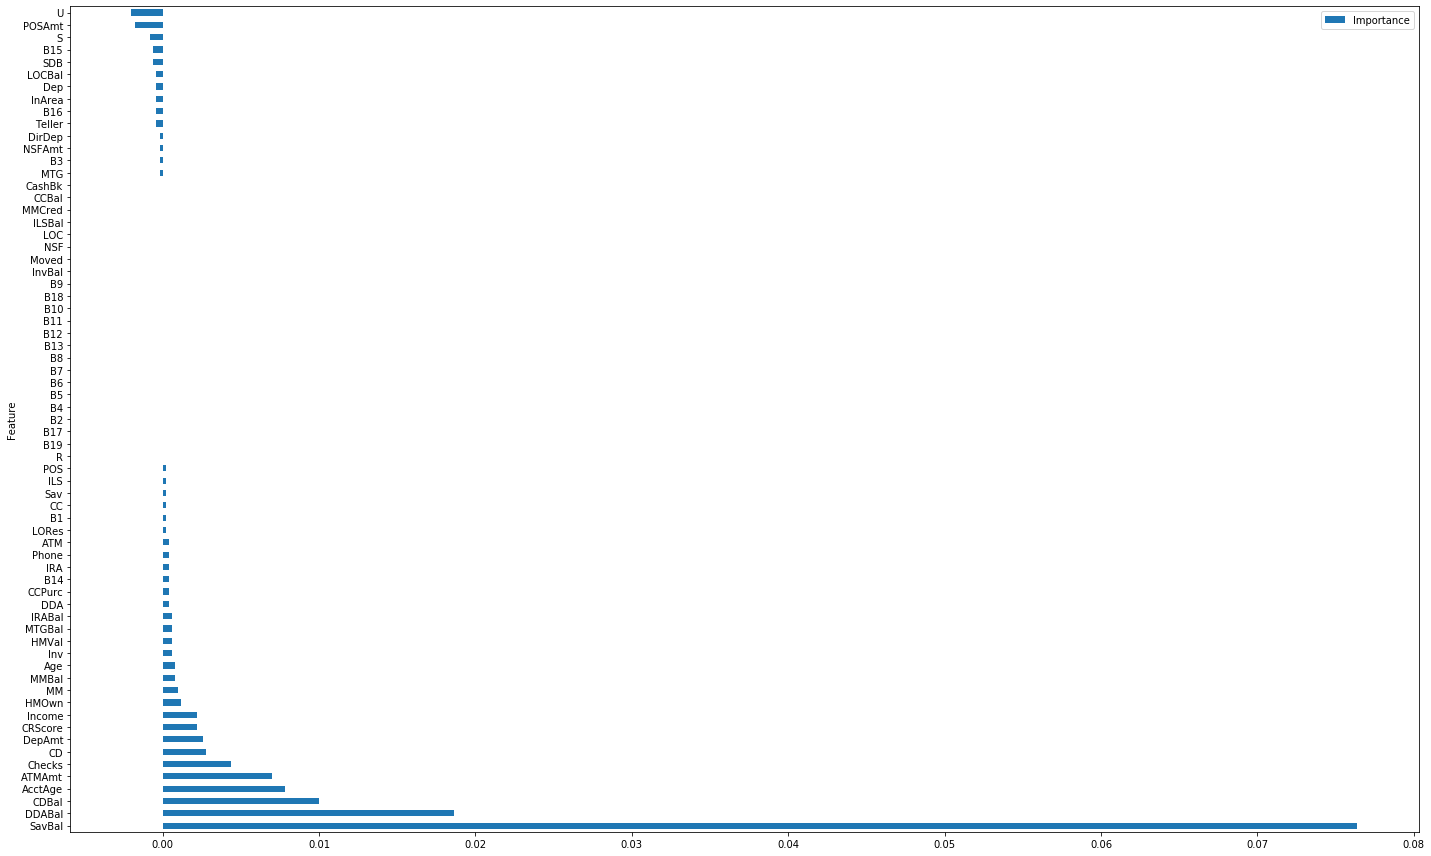

In [72]:
plt.figure(figsize=(20,10))
imp.plot.barh()
plt.tight_layout()

In [73]:
for tc in to_convert:
    vals=df_cleaned.loc[df_cleaned[tc]>0,tc].copy()
    vals=boxcox(vals)[0]
    df_cleaned.loc[df_cleaned[tc]>0,tc]=vals
    df_cleaned.loc[df_cleaned[tc]<0,tc]=-1

NameError: name 'to_convert' is not defined

In [ ]:
caat=['CCPurc','MMCred']

In [ ]:
df_cleaned.MMCred=df_cleaned.MMCred.astype(str)

In [ ]:
df_cleaned.CCPurc=df_cleaned.CCPurc.astype(str)

['CCPurc_0', 'CCPurc_1', 'CCPurc_2', 'CCPurc_3', 'CCPurc_4', 'CCPurc_5',
       'MMCred_0', 'MMCred_1', 'MMCred_2', 'MMCred_3', 'MMCred_4', 'MMCred_5']

In [ ]:
df_cleaned[['CCPurc_0', 'CCPurc_1', 'CCPurc_2', 'CCPurc_3', 'CCPurc_4', 'CCPurc_5','MMCred_0', 'MMCred_1', 'MMCred_2', 'MMCred_3', 'MMCred_4', 'MMCred_5']]=\
pd.get_dummies(df_cleaned[caat])

In [ ]:
to_convert=['SavBal','DDABal','CDBal','AcctAge','LOCBal','IRABal','Income','HMVal','InvBal','CRScore','Age','NSFAmt','ATMAmt','MTGBal','POSAmt','CCBal']

In [ ]:
sns.distplot(boxcox(df_cleaned[df_cleaned[cc]>0][[cc]])[0])

In [ ]:
sns.distplot(boxcox(df_cleaned[df_cleaned.DepAmt>0]['DepAmt'])[0])

In [ ]:
sns.distplot(boxcox(df_cleaned[df_cleaned.AcctAge>0]['AcctAge'])[0])

In [ ]:
sns.distplot(boxcox(df_cleaned[df_cleaned.CDBal>0]['CDBal'])[0])

In [ ]:
sns.distplot(np.log(df_cleaned[df_cleaned.SavBal>0]['SavBal']))

In [ ]:
sns.distplot(np.log(df_cleaned[df_cleaned.DDABal>0]['DDABal']))

In [ ]:
test_percent=.8
split_test=int(test_percent*df.shape[0])
train=df_cleaned[:split_test]
test=df_cleaned[split_test:]

In [ ]:
X_train,y_train=train.drop('Ins',axis=1),train[['Ins']]
X_test,y_test=test.drop('Ins',axis=1),test[['Ins']].values

In [ ]:
important_cols=list(imp[imp.Importance>0].index)

In [ ]:
m = RandomForestClassifier(n_estimators=250,n_jobs=-1,oob_score=True,min_samples_leaf=20,max_features=15,max_depth=30)
m.fit(X_train, y_train)

print_score(m)

In [ ]:
display_all(df.head())

In [ ]:
x =df[split_test:].copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.R.value_counts().plot.barh();

In [ ]:
sns.countplot(hue=x.R,x=x.Ins)

In [ ]:
sns.countplot(hue=x.S,x=x.Ins)

In [ ]:
sns.countplot(hue=x.U,x=x.Ins)

In [ ]:
flds = ['R','U','S', 'Ins', 'pred', 'pred_std']
enc_summ = x[flds].groupby(['R','S','U'], as_index=False).mean()
enc_summ

In [ ]:
from scipy.cluster import hierarchy as hc

In [ ]:
corr = np.round(scipy.stats.spearmanr(df_cleaned).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,20))
dendrogram = hc.dendrogram(z, labels=df_cleaned.columns, orientation='left', leaf_font_size=16)
plt.show()

In [ ]:
def get_oob():
    m = RandomForestClassifier(n_estimators=100, 
                           min_samples_leaf=20, 
                           max_features=20, 
                           n_jobs=-1, 
                           oob_score=True,max_depth=5,
                          )
#     m.fit(X_train.drop(c,axis=1), y_train.values.ravel())
    m.fit(X_train, y_train)
#     return print_score(m)
    print(m.oob_score_)

In [ ]:
corr_cols=['SavBal','Sav','CDBal','CD','IRABal','IRA','MMBal','MM','MTGBal','MTG','LOCBal','LOC','HMVal','Income','LORes','HMOwn','NSF','NSFAmt','ATMAmt','ATM','POSAmt','POS','CCBal','CC','InvBal','Inv']

In [ ]:
len(corr_cols)

In [ ]:
get_oob()

In [ ]:
for c in corr_cols:
    get_oob(c) 

In [ ]:
to_drop=['Sav','IRABal','LOCBal','HMVal','LORes','NSF','ATMAmt','POS','CC','InvBal']

get_oob(to_drop)

In [74]:
test_percent=.8
split_test=int(test_percent*df.shape[0])
train=df_cleaned[:split_test]
test=df_cleaned[split_test:]

In [75]:
X_train,y_train=train.drop('Ins',axis=1),train[['Ins']]
X_test,y_test=test.drop('Ins',axis=1),test[['Ins']].values

In [76]:
X_train=X_train.drop(to_drop,axis=1)
X_test=X_test.drop(to_drop,axis=1)

NameError: name 'to_drop' is not defined

In [77]:
m = RandomForestClassifier(n_estimators=500, 
                           min_samples_leaf=20, 
                           max_features=20, 
                           n_jobs=-1, 
                           oob_score=True,max_depth=5,
                          )

m.fit(X_train,y_train)

print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


{'roc_test': 0.7113757290198077,
 'roc_train': 0.7210740159980322,
 'r2_train': 0.7428615706481733,
 'r2_test': 0.7391910739191074,
 'oob_score': 0.7351516795164852}

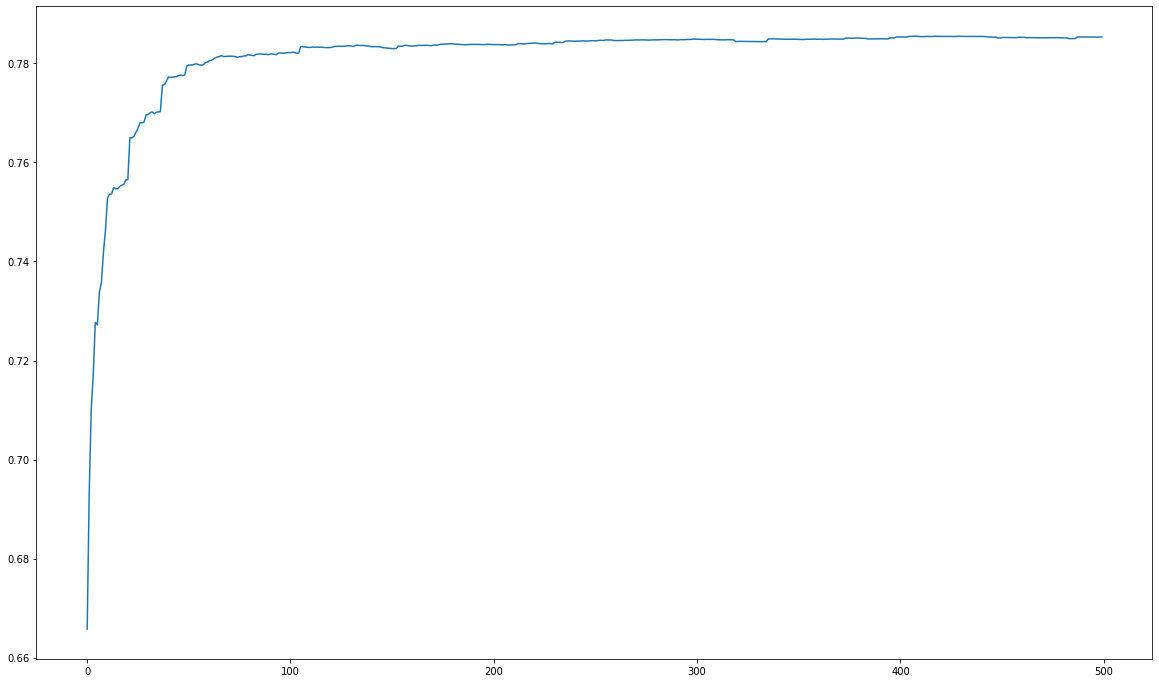

In [78]:
preds = np.stack([t.predict(X_test) for t in m.estimators_])

preds[:,0],np.mean(preds[:,0]),y_test[0]

preds.shape

plt.plot([metrics.roc_auc_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(500)]);

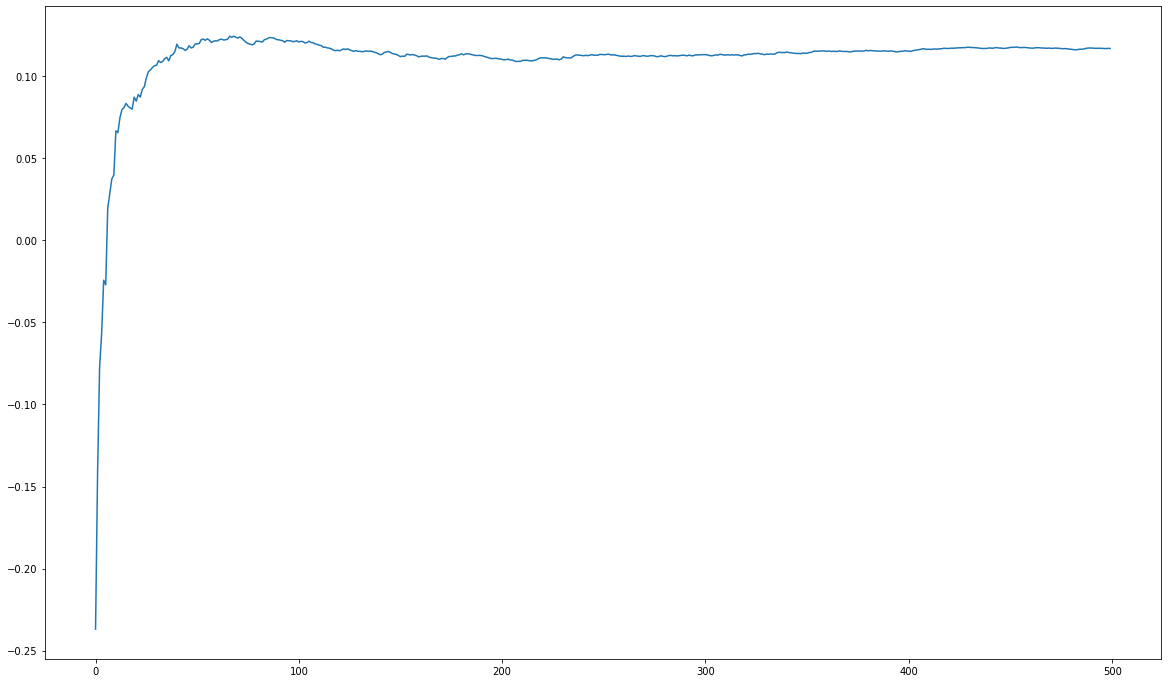

In [79]:
plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(500)]);

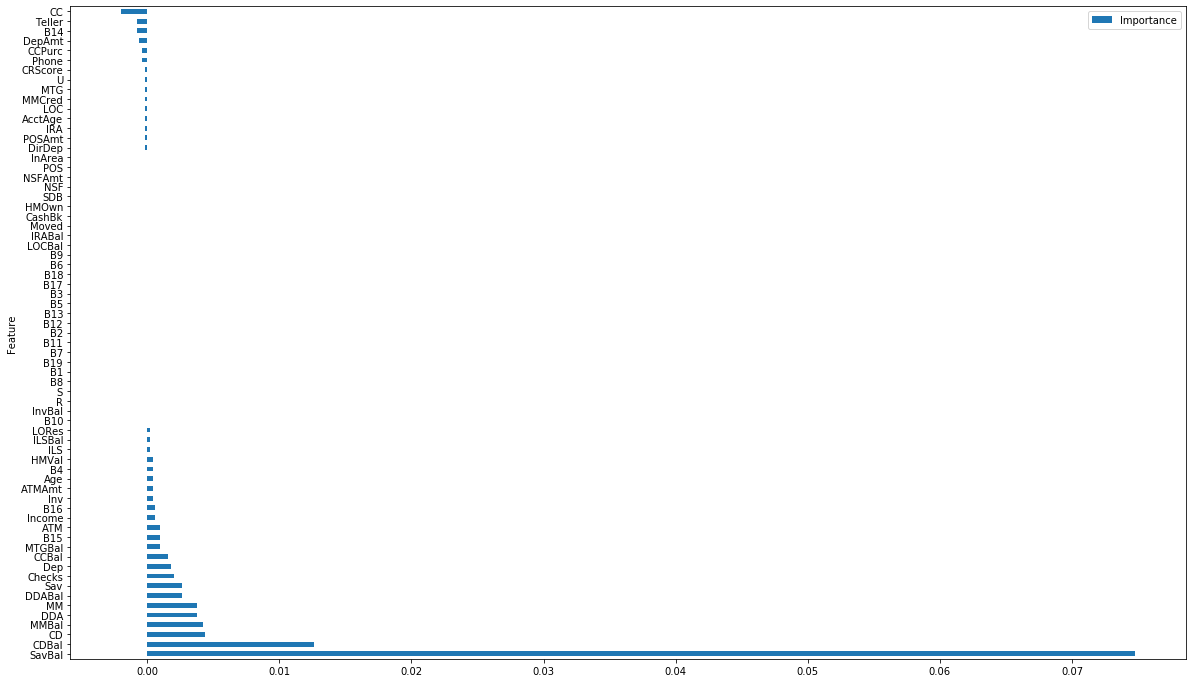

In [80]:
imp=rf.importances(m,X_test,pd.DataFrame(y_test))

imp.plot.barh()

In [81]:
set_rf_samples(11000)

In [82]:
important_cols=list(imp[imp.Importance!=0].index)

In [83]:
important_cols;len(important_cols)

39

In [84]:
m = RandomForestClassifier(n_estimators=200, 
                           min_samples_leaf=20, 
                            
                           n_jobs=-1, 
                           oob_score=True,
                           max_depth=25,
                          )

m.fit(X_train[important_cols],y_train)

imp_cols_print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


{'roc_test': 0.71778990326834,
 'roc_train': 0.7534571232571476,
 'r2_train': 0.770872883654256,
 'r2_test': 0.7453897412056408,
 'oob_score': 0.7445662701948782}

In [85]:
X_train=X_train[important_cols].copy()

In [86]:
X_test=X_test[important_cols].copy()

In [87]:
m = RandomForestClassifier(n_estimators=200, 
                           min_samples_leaf=29, 
                           max_features=20, 
                           n_jobs=-1, 
                           oob_score=True,
                           max_depth=25,
                          )

m.fit(X_train,y_train)

imp_cols_print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


{'roc_test': 0.7186688201649716,
 'roc_train': 0.7523962956490897,
 'r2_train': 0.7723451241718647,
 'r2_test': 0.7472493413916008,
 'oob_score': 0.7468908604858394}

In [88]:
m = RandomForestClassifier(n_estimators=200, 
                           min_samples_leaf=29, 
                           max_features=.5, 
                           n_jobs=-1, 
                           oob_score=True,
                           max_depth=25,
                          )

m.fit(X_train,y_train)

imp_cols_print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


{'roc_test': 0.7157738126682995,
 'roc_train': 0.7507459277329925,
 'r2_train': 0.7706404246251598,
 'r2_test': 0.7447698744769874,
 'oob_score': 0.7454186199682306}

In [89]:
m = RandomForestClassifier(n_estimators=200, 
                           min_samples_leaf=20, 
                           max_features=.5, 
                           n_jobs=-1, 
                           oob_score=True,
                           max_depth=25,
                          )

m.fit(X_train,y_train)

imp_cols_print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


{'roc_test': 0.7150785072030069,
 'roc_train': 0.7642821772642612,
 'r2_train': 0.7822246329084499,
 'r2_test': 0.7443049744304975,
 'oob_score': 0.7470845763434195}

# ------- PDP

In [425]:
from pdpbox import pdp
from plotnine import *

In [426]:
display_all(df_cleaned.head())

,AcctAge,DDA,DDABal,CashBk,Checks,DirDep,NSF,NSFAmt,Phone,Teller,Sav,SavBal,ATM,ATMAmt,POS,POSAmt,CD,CDBal,IRA,IRABal,LOC,LOCBal,ILS,ILSBal,MM,MMBal,MMCred,MTG,MTGBal,CC,CCBal,CCPurc,SDB,Income,HMOwn,LORes,HMVal,Age,CRScore,Moved,InArea,Ins,Dep,DepAmt,Inv,InvBal,R,S,U,B1,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B2,B3,B4,B5,B6,B7,B8,B9,CCPurc_0,CCPurc_1,CCPurc_2,CCPurc_3,CCPurc_4,CCPurc_5,MMCred_0,MMCred_1,MMCred_2,MMCred_3,MMCred_4,MMCred_5
0,-1.000000,1.0,8.134749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.479637,1.0,6.071581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,5.953342,0,0.0,4.233817,1,11.0,0.750066,27.574094,499.239500,0.0,1.0,1,2.0,1170.06,0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,-1.000000,1.0,11.094878,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,7.679113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,0.000000,1,0.0,1.701964,1,7.0,0.750007,23.390961,484.357893,0.0,1.0,0,1.0,446.93,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1.507328,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,0.000000,0,0.0,5.758047,1,8.5,0.750274,26.549423,461.301407,0.0,1.0,1,0.0,0.00,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,-1.000000,1.0,10.649974,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,9.081869,1.0,7.740663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,4.080597,0,0.0,10.429525,1,7.5,0.750984,20.832762,483.003591,0.0,1.0,0,1.0,1144.24,0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,2.079930,1.0,11.818285,0.0,2.0,0.0,0.0,0.0,0.0,5.0,1.0,13.565628,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.000000,0,0.0,5.287356,1,6.0,0.750363,21.573855,466.732921,0.0,1.0,1,2.0,1208.94,0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [424]:
m = RandomForestClassifier(n_estimators=200, 
                           min_samples_leaf=20, 
                           max_features=.5, 
                           n_jobs=-1, 
                           oob_score=True,
                           max_depth=25,
                          )

m.fit(X_train,y_train)

imp_cols_print_score(m)

C:\Users\HP\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


{'roc_test': 0.713367666380558,
 'roc_train': 0.7554773158504927,
 'r2_train': 0.7752121188640502,
 'r2_test': 0.7430652409731907,
 'oob_score': 0.7446050133663942}

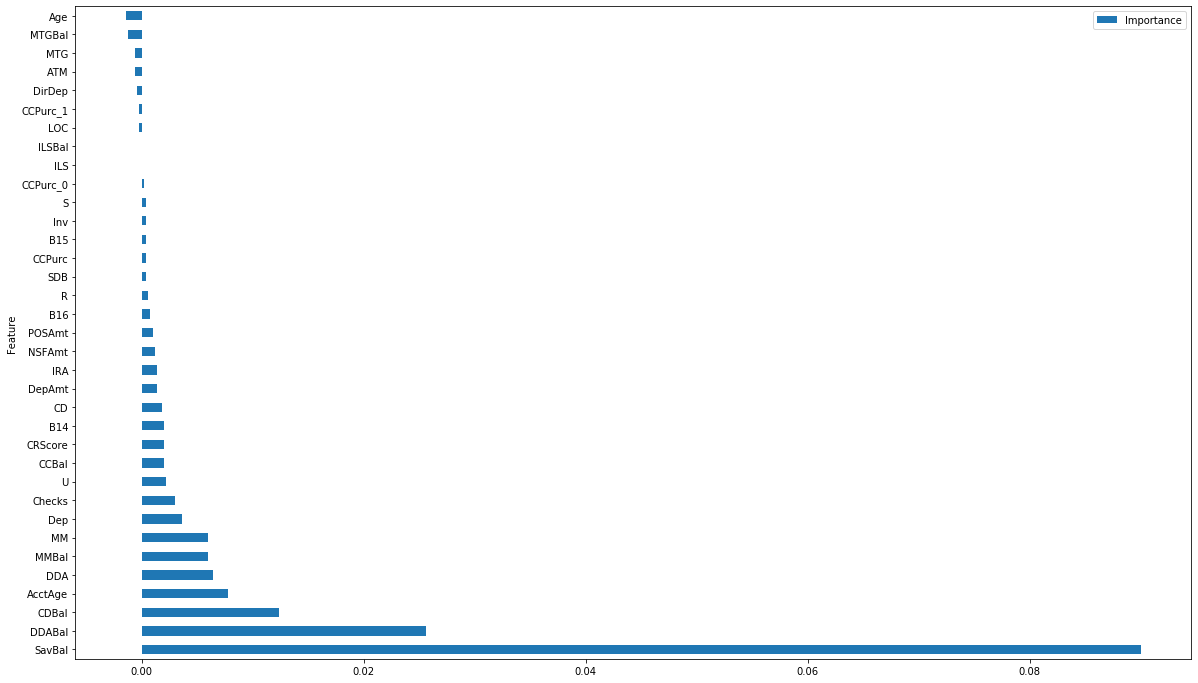

In [427]:
imp=rf.importances(m,X_test,pd.DataFrame(y_test))

imp.plot.barh()

In [545]:
x_all = get_sample(df_cleaned[df_cleaned.AcctAge>0], 5000)

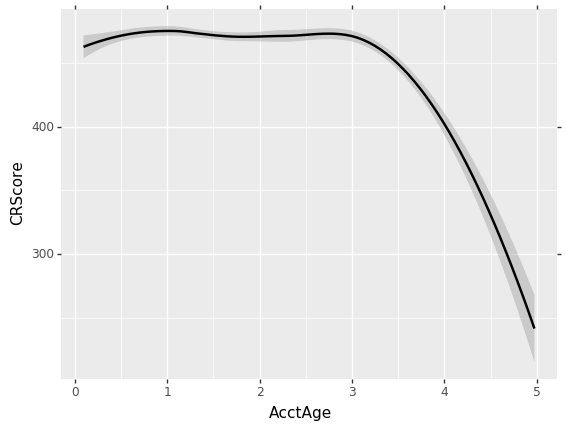

<ggplot: (109679139129)>

In [546]:
ggplot(x_all, aes('AcctAge', 'CRScore'))+stat_smooth(se=True, method='loess')

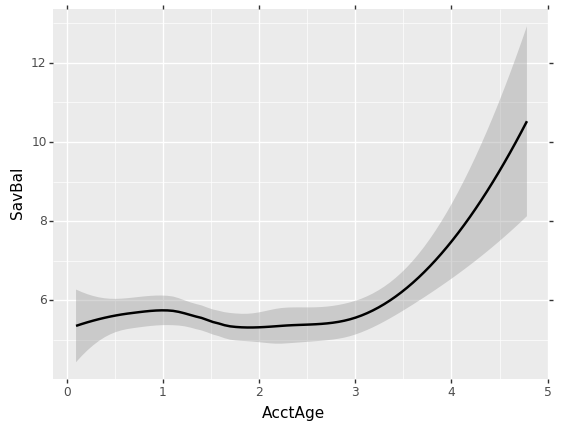

<ggplot: (-9223371927175530983)>

In [429]:
ggplot(x_all, aes('AcctAge', 'SavBal'))+stat_smooth(se=True, method='loess')

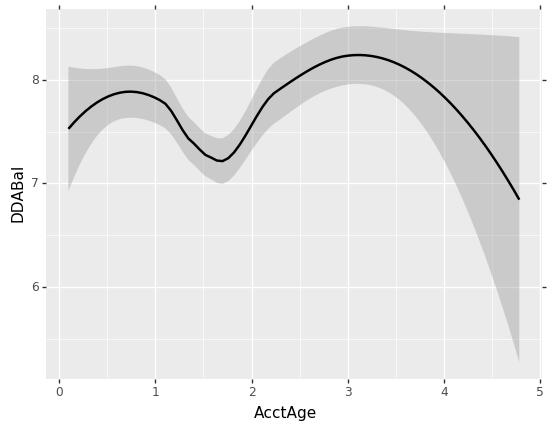

<ggplot: (109679284758)>

In [430]:
ggplot(x_all, aes('AcctAge', 'DDABal'))+stat_smooth(se=True, method='loess')

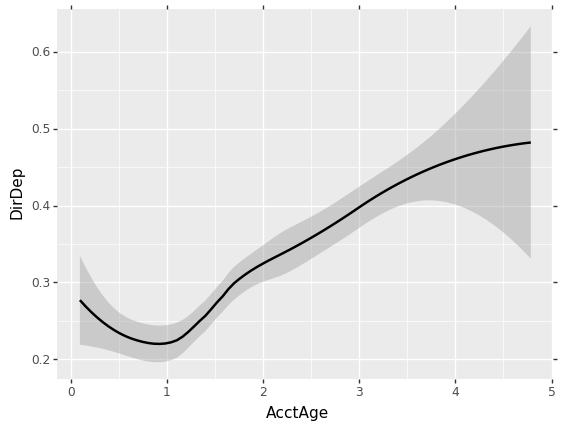

<ggplot: (109679266203)>

In [431]:
ggplot(x_all, aes('AcctAge', 'DirDep'))+stat_smooth(se=True, method='loess')

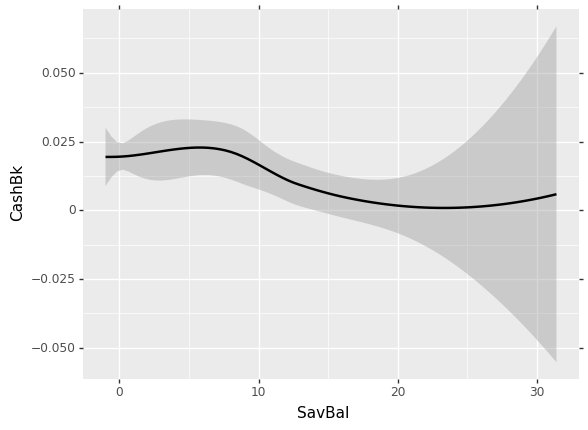

<ggplot: (-9223371927175466275)>

In [432]:
ggplot(x_all, aes('SavBal', 'CashBk'))+stat_smooth(se=True, method='loess')

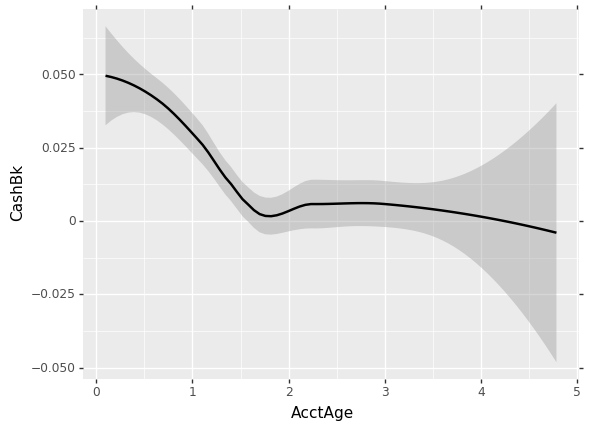

<ggplot: (109679238064)>

In [433]:
ggplot(x_all, aes('AcctAge', 'CashBk'))+stat_smooth(se=True, method='loess')

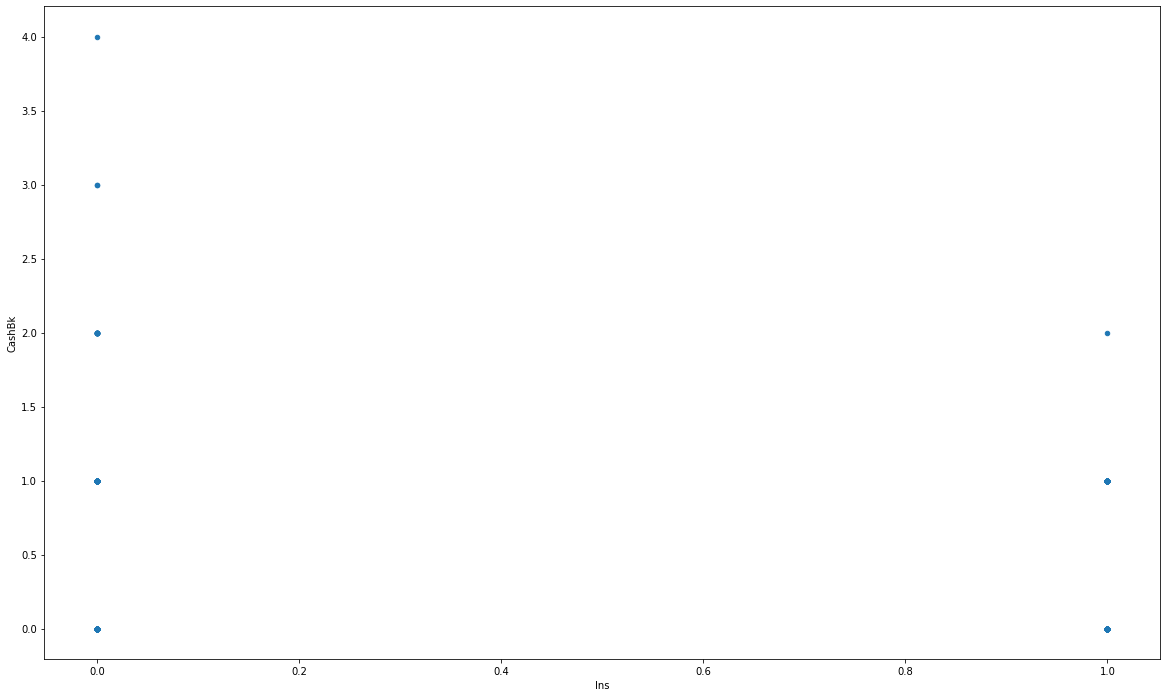

In [434]:
df_cleaned.plot.scatter('Ins','CashBk')

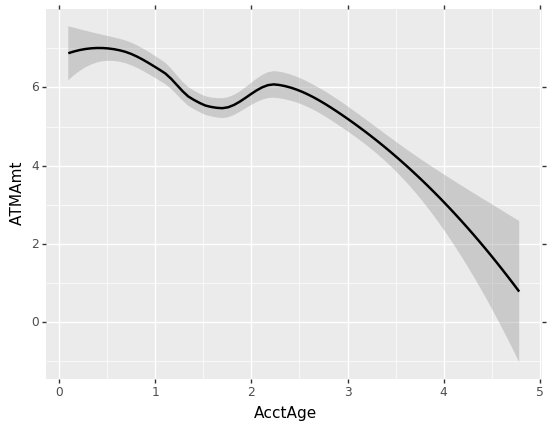

<ggplot: (-9223371927175595744)>

In [435]:
ggplot(x_all, aes('AcctAge', 'ATMAmt'))+stat_smooth(se=True, method='loess')

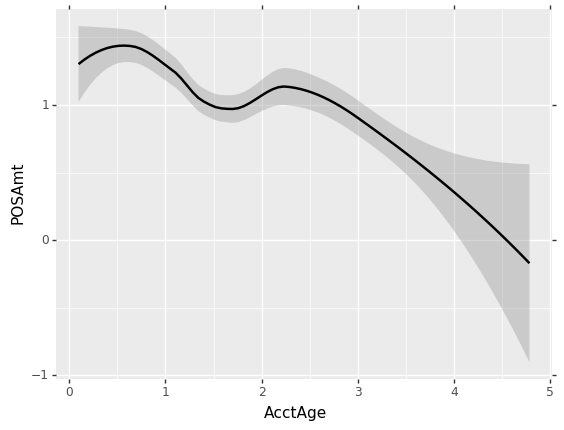

<ggplot: (109679218061)>

In [436]:
ggplot(x_all, aes('AcctAge', 'POSAmt'))+stat_smooth(se=True, method='loess')

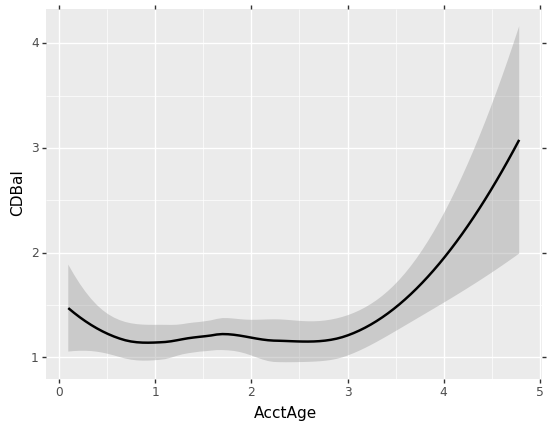

<ggplot: (109679448040)>

In [437]:
ggplot(x_all, aes('AcctAge', 'CDBal'))+stat_smooth(se=True, method='loess')

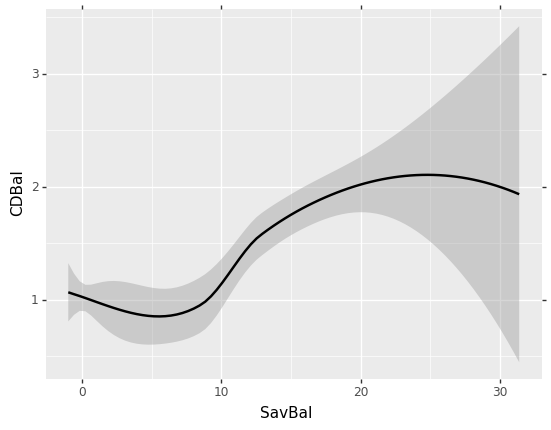

<ggplot: (-9223371927175295751)>

In [438]:
ggplot(x_all, aes('SavBal', 'CDBal'))+stat_smooth(se=True, method='loess')

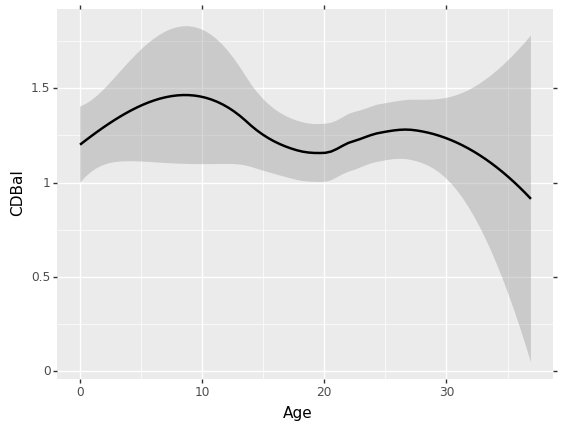

<ggplot: (-9223371927175587296)>

In [439]:
ggplot(x_all, aes('Age', 'CDBal'))+stat_smooth(se=True, method='loess')

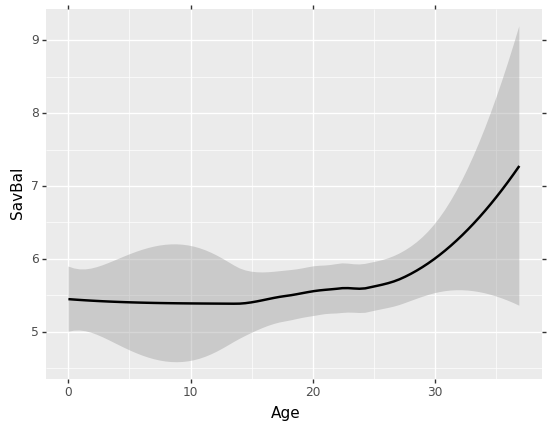

<ggplot: (109679470407)>

In [440]:
ggplot(x_all, aes('Age', 'SavBal'))+stat_smooth(se=True, method='loess')

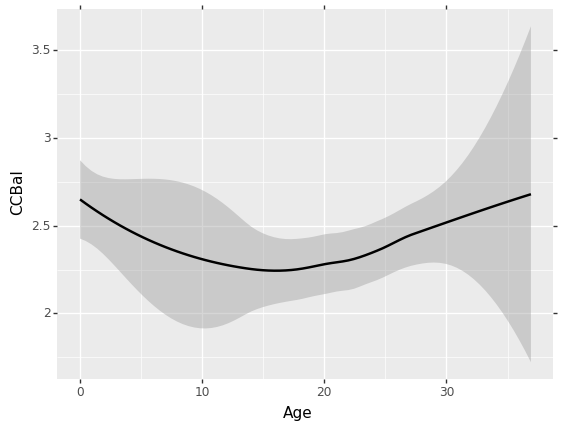

<ggplot: (109679459592)>

In [441]:
ggplot(x_all, aes('Age', 'CCBal'))+stat_smooth(se=True, method='loess')

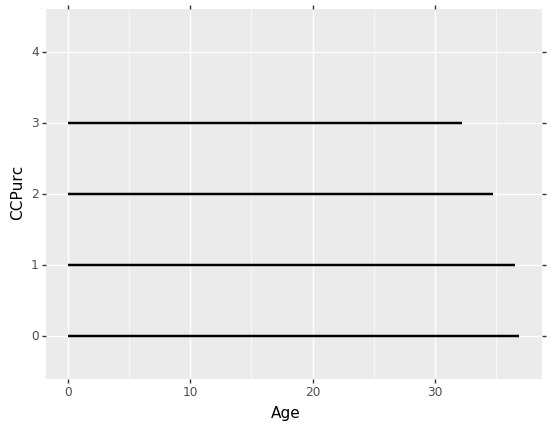

<ggplot: (109679607090)>

In [442]:
ggplot(x_all, aes('Age', 'CCPurc'))+stat_smooth(se=True, method='loess')

In [443]:
x = get_sample(X_train[X_train.AcctAge>0], 5000)

In [444]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

In [547]:
plot_pdp('CRScore',10)

ValueError: X has 35 features per sample; expecting 34

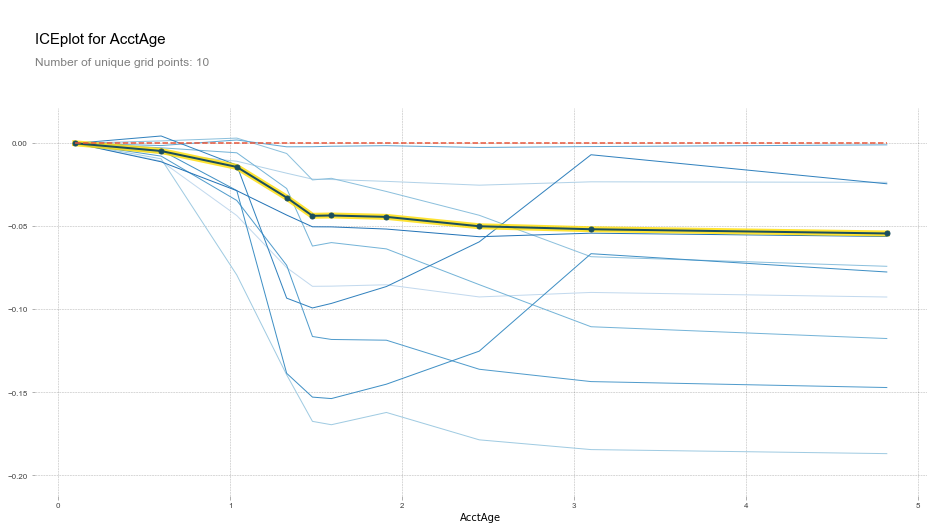

In [445]:
plot_pdp('AcctAge',10)

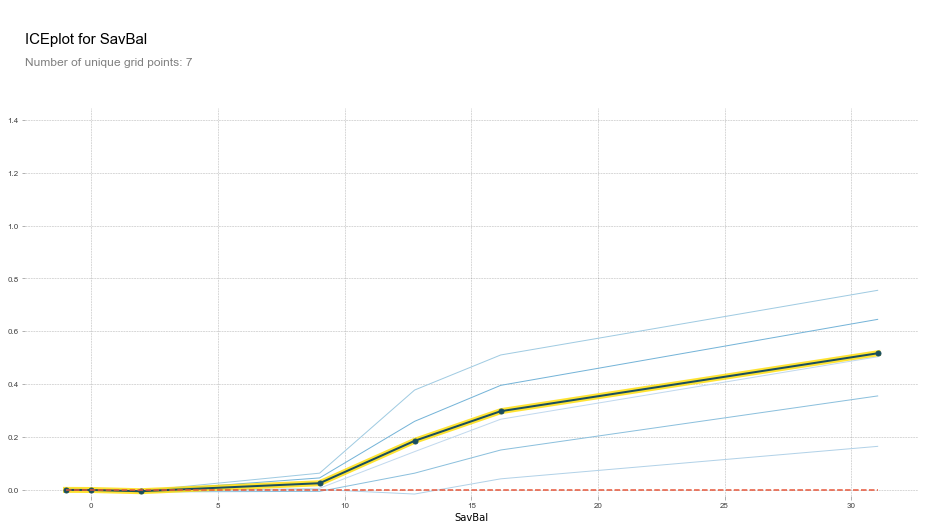

In [446]:
plot_pdp('SavBal',5)

In [ ]:
plot_pdp('SavBal',5)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

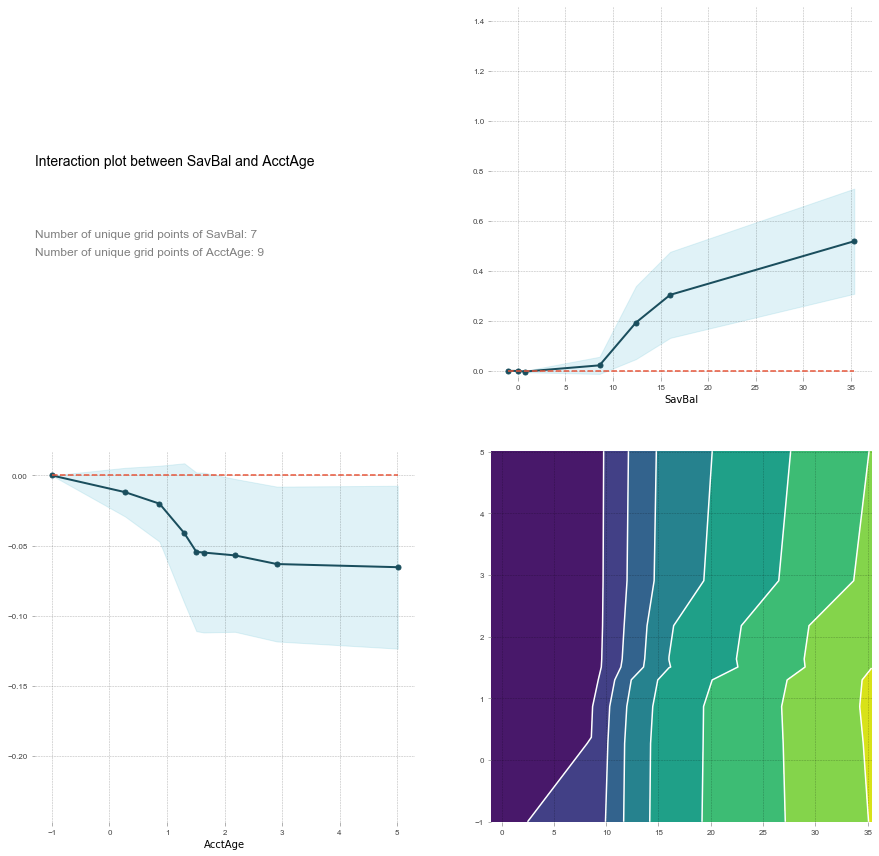

In [447]:
feats=['SavBal','AcctAge']
p=pdp.pdp_interact(m,X_train,feats)
pdp.pdp_interact_plot(p, feats)

In [448]:
important_cols

['SavBal',
 'CDBal',
 'MMBal',
 'CD',
 'DDA',
 'MM',
 'B15',
 'DDABal',
 'AcctAge',
 'IRA',
 'Checks',
 'B16',
 'ILSBal',
 'Inv',
 'MTG',
 'U',
 'POSAmt',
 'NSFAmt',
 'R',
 'ILS',
 'Age',
 'S',
 'SDB',
 'ATM',
 'DepAmt',
 'CCPurc_0',
 'LOC',
 'MTGBal',
 'B14',
 'CCPurc',
 'CCPurc_1',
 'CRScore',
 'DirDep',
 'CCBal',
 'Dep']

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

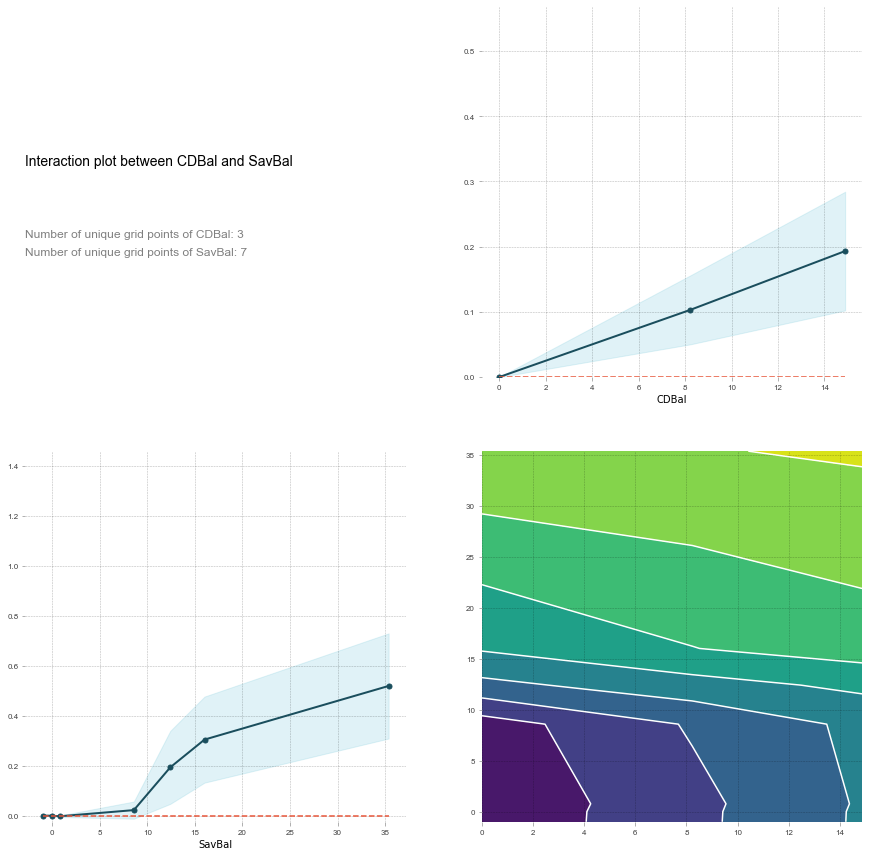

In [449]:
feats=['CDBal','SavBal']
p=pdp.pdp_interact(m,X_train,feats)
pdp.pdp_interact_plot(p, feats)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

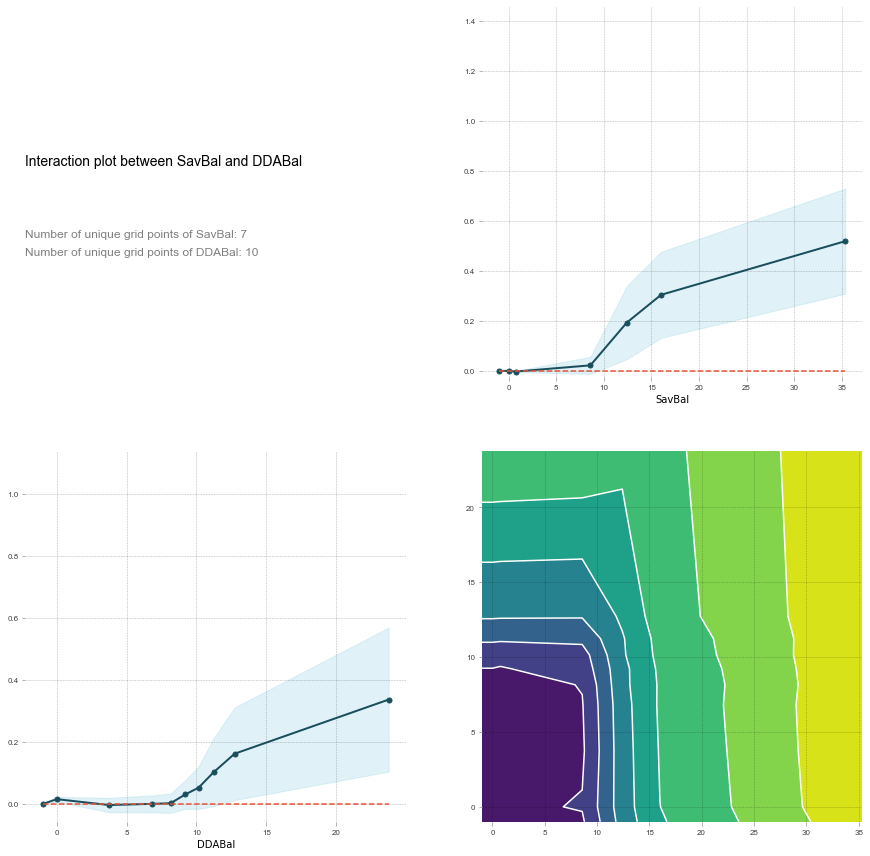

In [451]:
feats=['SavBal','DDABal']
p=pdp.pdp_interact(m,X_train,feats)
pdp.pdp_interact_plot(p, feats)

In [456]:
to_convert

['SavBal',
 'DDABal',
 'CDBal',
 'AcctAge',
 'LOCBal',
 'IRABal',
 'Income',
 'HMVal',
 'InvBal',
 'CRScore',
 'Age',
 'NSFAmt',
 'ATMAmt',
 'MTGBal',
 'POSAmt',
 'CCBal']

In [454]:
m = RandomForestClassifier(n_estimators=200, 
                           min_samples_leaf=20, 
                           max_features=.5, 
                           n_jobs=-1, 
                           oob_score=True,
                           max_depth=25,)


m.fit(xxtrain,y_train)

imp_cols_print_score(m)

{'roc_test': 0.7171456748379825,
 'roc_train': 0.7552498565740273,
 'r2_train': 0.7749796598349541,
 'r2_test': 0.7461645746164575,
 'oob_score': 0.7450699314245864}

In [485]:
xxtrain=X_train.copy()
xxtest=X_test.copy()

In [486]:
m_cols=['CDBal','SavBal','DDABal','NSFAmt','MTGBal','POSAmt','CCBal']

In [487]:
xxtrain['modified']=(xxtrain[m_cols[0]] + xxtrain[m_cols[1]])
xxtest['modified']=(xxtest[m_cols[0]] + xxtest[m_cols[1]])

In [488]:
xxtrain['modified_1']=(xxtrain[m_cols[1]] + xxtrain[m_cols[2]])
xxtest['modified_1']=(xxtest[m_cols[1]] + xxtest[m_cols[2]])

In [489]:
xxtrain['modified_2']=(xxtrain[m_cols[1]] * xxtrain[m_cols[-1]])
xxtest['modified_2']=(xxtest[m_cols[1]] * xxtest[m_cols[-1]])

In [490]:
xxtrain['modified_3']=(xxtrain[m_cols[1]] - xxtrain[m_cols[3]])
xxtest['modified_3']=(xxtest[m_cols[1]] - xxtest[m_cols[3]])

In [491]:
xxtrain['modified_4']=(xxtrain[m_cols[1]] + xxtrain[m_cols[4]])
xxtest['modified_4']=(xxtest[m_cols[1]] + xxtest[m_cols[4]])

In [492]:
xxtrain['modified_5']=(xxtrain[m_cols[1]] + xxtrain[m_cols[5]])
xxtest['modified_5']=(xxtest[m_cols[1]] + xxtest[m_cols[5]])

In [493]:
xxtrain.drop(m_cols,axis=1,inplace=True)
xxtest.drop(m_cols,axis=1,inplace=True)

In [494]:
m = RandomForestClassifier(n_estimators=200, 
                           min_samples_leaf=20, 
                           max_features=.5, 
                           n_jobs=-1, 
                           oob_score=True,
                           max_depth=25,)


m.fit(xxtrain,y_train)

xx_print_score(m)

{'roc_test': 0.7126210368483666,
 'roc_train': 0.7538199403079962,
 'r2_train': 0.7731199876021851,
 'r2_test': 0.7422904075623741,
 'oob_score': 0.7427065979621091}

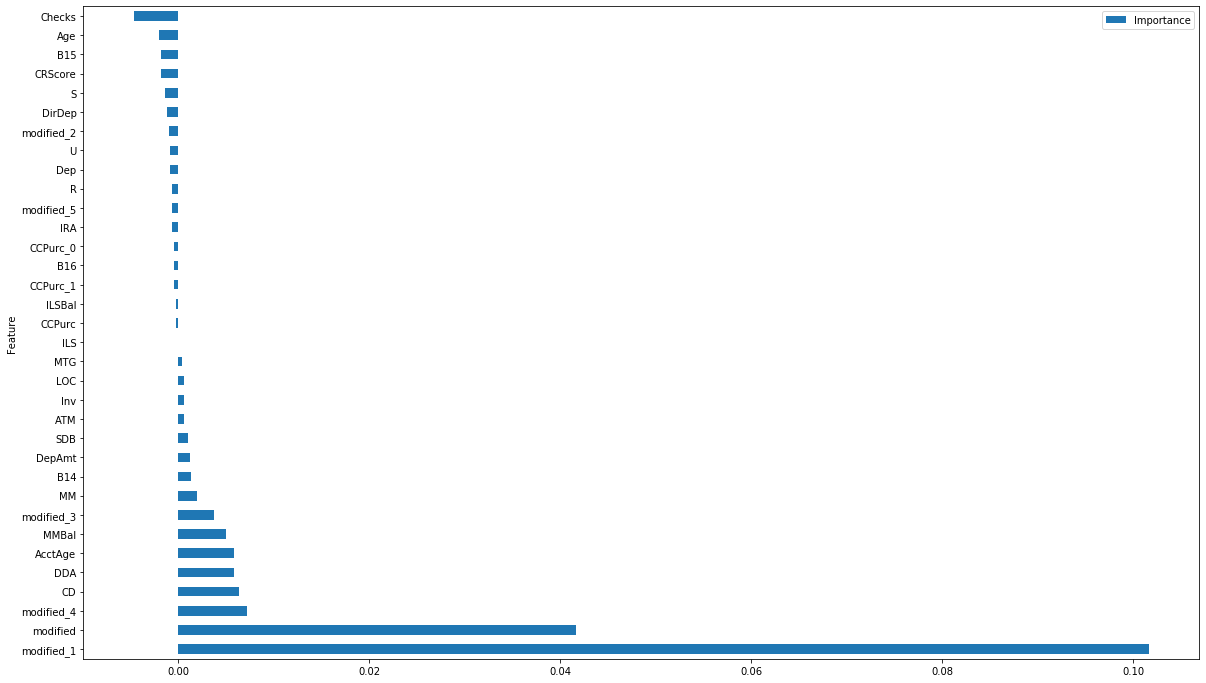

In [495]:
imp=rf.importances(m,xxtest,pd.DataFrame(y_test))

imp.plot.barh()

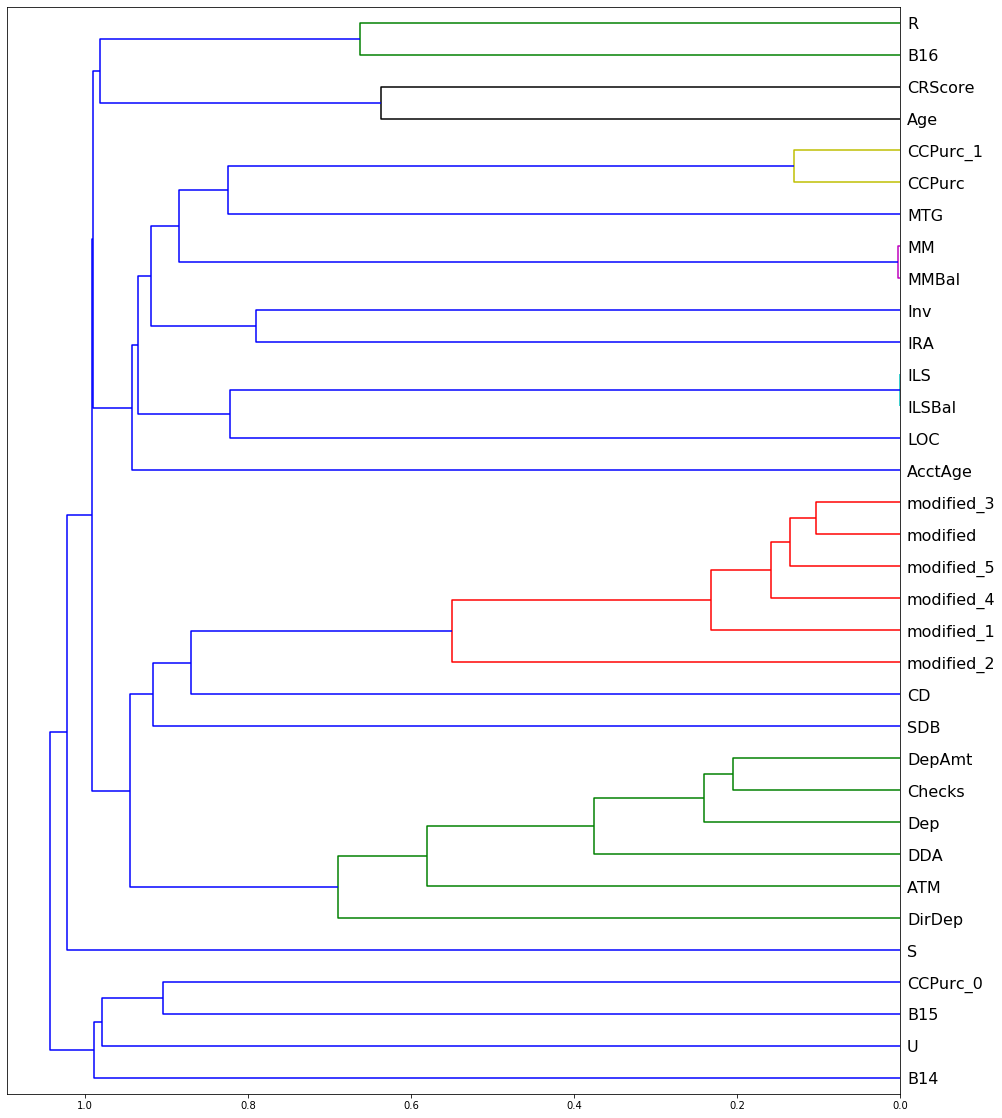

In [496]:
corr = np.round(scipy.stats.spearmanr(xxtrain).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,20))
dendrogram = hc.dendrogram(z, labels=xxtrain.columns, orientation='left', leaf_font_size=16)
plt.show()

In [500]:
X_train.drop(m_cols,axis=1,inplace=True)
X_test.drop(m_cols,axis=1,inplace=True)

In [498]:
X_train['modified']=xxtrain['modified']
X_train['modified_1']=xxtrain['modified_1']
X_train['modified_2']=xxtrain['modified_2']
X_train['modified_3']=xxtrain['modified_3']
X_train['modified_4']=xxtrain['modified_4']
X_train['modified_5']=xxtrain['modified_5']

In [499]:
X_test['modified']=xxtest['modified']
X_test['modified_1']=xxtest['modified_1']
X_test['modified_2']=xxtest['modified_2']
X_test['modified_3']=xxtest['modified_3']
X_test['modified_4']=xxtest['modified_4']
X_test['modified_5']=xxtest['modified_5']

In [501]:
m = RandomForestClassifier(n_estimators=200, 
                           min_samples_leaf=20, 
                           max_features=.5, 
                           n_jobs=-1, 
                           oob_score=True,
                           max_depth=25,)


m.fit(X_train,y_train)

print_score(m)

{'roc_test': 0.7120916887545122,
 'roc_train': 0.7547686705014832,
 'r2_train': 0.7738948510325055,
 'r2_test': 0.741825507515884,
 'oob_score': 0.7439851226221379}

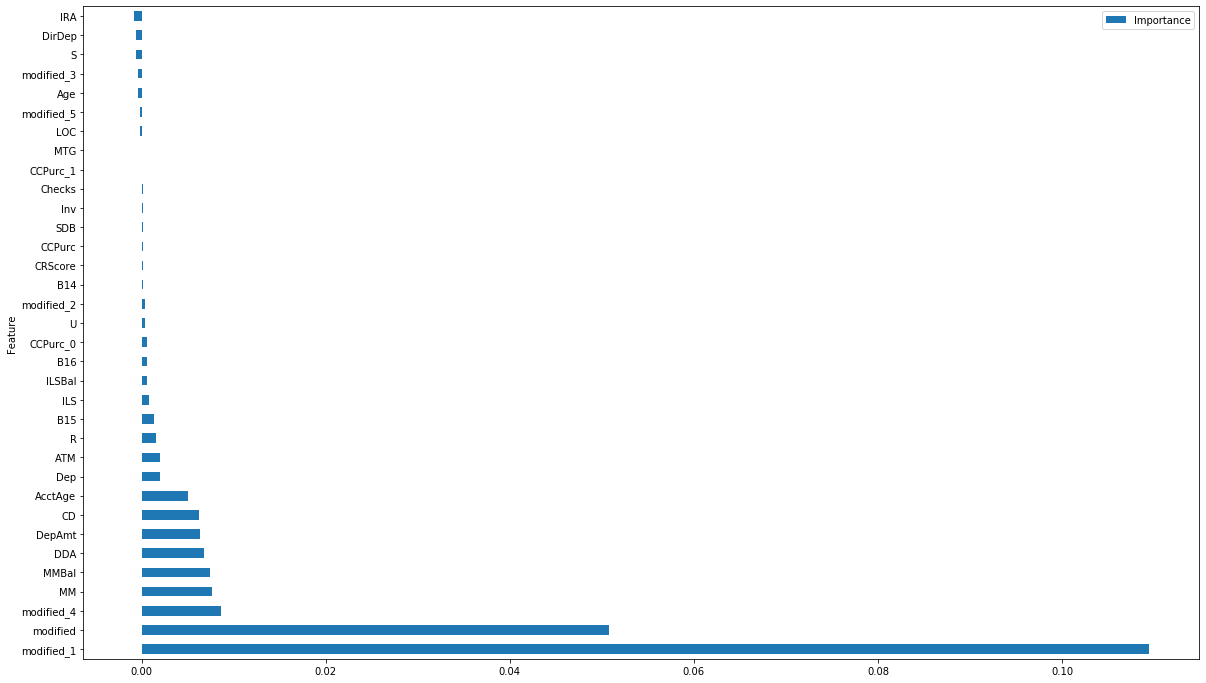

In [502]:
imp=rf.importances(m,X_test,pd.DataFrame(y_test))

imp.plot.barh()

In [ ]:
newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga

In [503]:
from sklearn.linear_model import LogisticRegressionCV

In [509]:
m=LogisticRegressionCV(Cs=7,cv=5,n_jobs=-1,penalty='l1',solver='liblinear')

In [510]:
m.fit(X_train,y_train)

LogisticRegressionCV(Cs=7, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l1',
                     random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [511]:
print_score(m)

{'roc_test': 0.7051900820636298,
 'roc_train': 0.713842143724372,
 'r2_train': 0.7373212971213824,
 'r2_test': 0.7345420734542073}

In [525]:
list(m.coef_[0])

[-1.8335722258869276e-05,
 0.23475202971804154,
 -2.4052246633966377,
 1.090374526704275,
 -0.8300700665797743,
 -0.10611509005027696,
 0.46554663941628077,
 -0.027318806630158118,
 -0.6997964534456791,
 6.129312856749744e-05,
 0.47101092063096084,
 -0.11351444404619576,
 0.08387869705148703,
 0.09971216808995104,
 -0.820462046141268,
 0.0005076681934757619,
 0.07736772447435028,
 0.0741465327682153,
 -0.21319771984006283,
 9.451754372378619e-06,
 -0.830660210317011,
 -0.1360825846245821,
 -1.0615897985420528,
 -0.3508908836928225,
 -0.27101527297276223,
 -8.324719217217779e-05,
 -0.23249819627367874,
 -0.011959403767613173,
 0.061551411816211155,
 0.2048216444275933,
 3.985984055540154e-07,
 -0.15224673026180932,
 -0.0023033743555564614,
 -0.022750629713112338]

In [513]:
m.intercept_

array([0.23316])

In [523]:
list(X_train.columns)

['MMBal',
 'CD',
 'DDA',
 'MM',
 'B15',
 'AcctAge',
 'IRA',
 'Checks',
 'B16',
 'ILSBal',
 'Inv',
 'MTG',
 'U',
 'R',
 'ILS',
 'Age',
 'S',
 'SDB',
 'ATM',
 'DepAmt',
 'CCPurc_0',
 'LOC',
 'B14',
 'CCPurc',
 'CCPurc_1',
 'CRScore',
 'DirDep',
 'Dep',
 'modified',
 'modified_1',
 'modified_2',
 'modified_3',
 'modified_4',
 'modified_5']

In [536]:
pd.DataFrame({'coeff':m.coef_[0],'feat':X_train.columns}).sort_values('coeff',ascending=False)

,coeff,feat
3,1.090375e+00,MM
10,4.710109e-01,Inv
6,4.655466e-01,IRA
1,2.347520e-01,CD
29,2.048216e-01,modified_1
13,9.971217e-02,R
12,8.387870e-02,U
16,7.736772e-02,S
17,7.414653e-02,SDB
28,6.155141e-02,modified
